<a href="https://colab.research.google.com/github/SwethaVipparla/Tensorflow/blob/master/RNN/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3432 - accuracy: 0.8895 - val_loss: 0.1296 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1057 - accuracy: 0.9685 - val_loss: 0.0974 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.0615 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0631 - val_accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0522 -

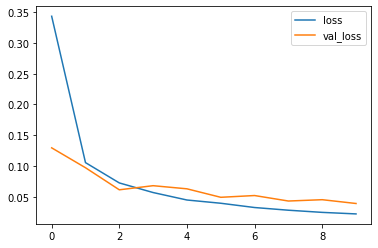

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

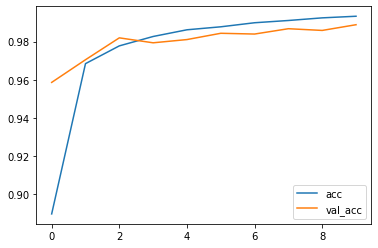

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    1    0    0    0    3    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   2    1 1017    5    0    0    1    4    1    1]
 [   0    0    3 1001    0    2    0    1    2    1]
 [   1    0    0    1  961    0    5    2    0   12]
 [   2    1    0    7    0  877    1    0    2    2]
 [   0    2    0    0    2    5  949    0    0    0]
 [   0    3    3    1    0    0    0 1018    0    3]
 [   0    0    2    1    0    1    0    3  964    3]
 [   0    1    0    1    4    1    0    6    2  994]]


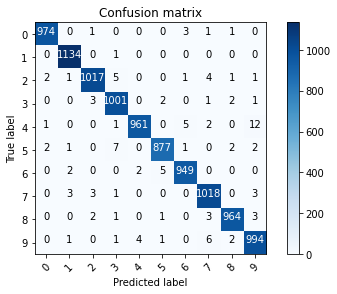

In [8]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

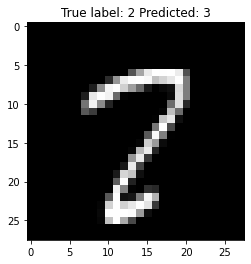

In [9]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));